# PREDICTING CUSTOMER CHURN

### Identifying customers that are susceptible to churn in order to enhance retention strategies and boost business growth.

#### Import necessary libraries

In [2]:
from ast import literal_eval
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from tqdm import tqdm

RSEED=42

import warnings
warnings.filterwarnings('ignore')

#### Loaing the dataset

In [5]:
# loading the dataset

df = pd.read_excel('../data/Dataset.xlsx')

df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              12483 non-null  int64 
 1   Name                    12483 non-null  object
 2   Age                     12483 non-null  int64 
 3   Gender                  12483 non-null  object
 4   Location                12483 non-null  object
 5   Email                   12483 non-null  object
 6   Phone                   12483 non-null  object
 7   Address                 12483 non-null  object
 8   Segment                 12483 non-null  object
 9   PurchaseHistory         12483 non-null  object
 10  SubscriptionDetails     12483 non-null  object
 11  ServiceInteractions     12483 non-null  object
 12  PaymentHistory          12483 non-null  object
 13  WebsiteUsage            12483 non-null  object
 14  ClickstreamData         12483 non-null  object
 15  En

In [7]:
# checking for missing values

missing_values = df.isnull().sum()

missing_values

CustomerID                0
Name                      0
Age                       0
Gender                    0
Location                  0
Email                     0
Phone                     0
Address                   0
Segment                   0
PurchaseHistory           0
SubscriptionDetails       0
ServiceInteractions       0
PaymentHistory            0
WebsiteUsage              0
ClickstreamData           0
EngagementMetrics         0
Feedback                  0
MarketingCommunication    0
NPS                       0
ChurnLabel                0
Timestamp                 0
dtype: int64

In [8]:
# Checking for duplicates

duplicate_rows = df[df.duplicated()]
num_duplicates = duplicate_rows.shape[0]
total_rows = df.shape[0]
duplicate_percentage = (num_duplicates / total_rows) * 100

print('Number of duplicate rows:', num_duplicates)
print(f'Percentage of duplicate rows: {duplicate_percentage:.2f}%')

Number of duplicate rows: 0
Percentage of duplicate rows: 0.00%


In [9]:
# Inspecting unique values per column

for col in df.columns:
    print(col)
    print(df[col].nunique())

CustomerID
12483
Name
11617
Age
53
Gender
2
Location
9255
Email
12138
Phone
12483
Address
12483
Segment
3
PurchaseHistory
12483
SubscriptionDetails
12472
ServiceInteractions
12467
PaymentHistory
6173
WebsiteUsage
6248
ClickstreamData
12483
EngagementMetrics
90
Feedback
12483
MarketingCommunication
12479
NPS
10
ChurnLabel
2
Timestamp
12482


#### Getting the statistical overview of numerical columns

In [10]:
stats_overview = df.describe()
stats_overview

,CustomerID,Age,NPS,ChurnLabel
count,12483.00000,12483.000000,12483.000000,12483.000000
mean,7242.00000,43.930065,2.973884,0.505808
std,3603.67604,15.341521,2.644623,0.499986
min,1001.00000,18.000000,0.000000,0.000000
25%,4121.50000,31.000000,1.000000,0.000000
50%,7242.00000,44.000000,2.000000,1.000000
75%,10362.50000,57.000000,4.000000,1.000000
max,13483.00000,70.000000,9.000000,1.000000


#### Checking the distribution of the ChurnLabel which is the target variable, and some other variables.

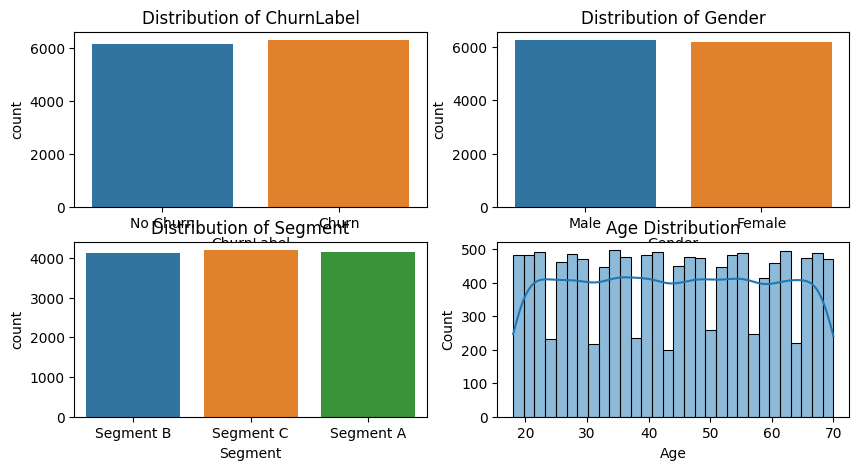

In [12]:
# set up the figures and axes
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

# plot the distribution of the target variable ChurnLabel
sns.countplot(x='ChurnLabel', data=df, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of ChurnLabel')
ax[0,0].set_xticklabels(['No Churn', 'Churn'])

# plot the distribution of gender
sns.countplot(x='Gender', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Gender')

# plot the distribution of Segment
sns.countplot(x='Segment', data=df, ax=ax[1,0])
ax[1,0].set_title('Distribution of Segment')

# plot the distribution of age
sns.histplot(df['Age'], bins=30, ax=ax[1,1], kde=True)
ax[1,1].set_title('Age Distribution')

plt.tight_layout
plt.show()

#### Correlation Analysis

Which column in the dataset correlates with the `ChurnLabel`column.
This will show which columns have higher effect on the ChurnLabel

In [13]:
# calculating correlation with ChurnLabel

correl = df.select_dtypes(include=np.number).corr()
correl

,CustomerID,Age,NPS,ChurnLabel
CustomerID,1.000000,-0.002670,-0.002513,0.001530
Age,-0.002670,1.000000,0.000006,0.010273
NPS,-0.002513,0.000006,1.000000,-0.540703
ChurnLabel,0.001530,0.010273,-0.540703,1.000000


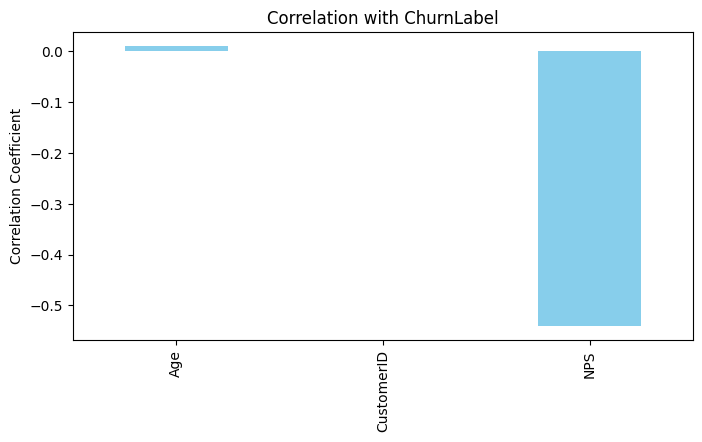

ChurnLabel    1.000000
Age           0.010273
CustomerID    0.001530
NPS          -0.540703
Name: ChurnLabel, dtype: float64

In [16]:
correlation = df.select_dtypes(include=np.number).corr()['ChurnLabel'].sort_values(ascending=False)

# plot the correlation

plt.figure(figsize=(8, 4))
correlation.drop('ChurnLabel').plot(kind='bar', color='skyblue')
plt.title('Correlation with ChurnLabel')
plt.ylabel('Correlation Coefficient')
plt.show()

correlation

The column with the most correlation is NPS, which has a moderate negative correlation. This is an indication that it has some level of influence on the ChurnLabel

#### Exploring the nested columns

In [17]:
# List of the nested columns
nested_columns = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]

# print out the first value in each of the columns
w1, w2 = 15, 1000
for col in nested_columns:
    row = [col, df[col][0]]
    print ('\n| {:<{w1}} | {:<{w2}} |'.format(*row, w1=w1, w2=w2))


| PurchaseHistory | [{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43}, {'Product': 'Printer, Copier & Fax Machine Accessories', 'Frequency': 7, 'Value': 397.14}, {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92}, {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43}, {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08}, {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68}, {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

### Temporal Analysis
To see how the Churn distributes itself over time. Checking for patterns(monthly distribution)

In [18]:
# convert Timestamp to datetime format for ease of computation

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# extract the month-year from the Timestamp

df['MonthYear'] = df['Timestamp'].dt.to_period('M')

df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp,MonthYear
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49,2020-01
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03,2019-01
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10,2019-04
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28,2020-03
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22,2019-04


In [19]:
# group by MonthYear and calculate the churn rate
monthly_churn_rate = df.groupby('MonthYear')['ChurnLabel'].sum()
monthly_churn_rate

MonthYear
2019-01    132
2019-02    139
2019-03    139
2019-04    130
2019-05    124
2019-06    139
2019-07    153
2019-08    127
2019-09    135
2019-10    124
2019-11    137
2019-12    120
2020-01    131
2020-02    137
2020-03    140
2020-04    135
2020-05    132
2020-06    115
2020-07    149
2020-08    139
2020-09    147
2020-10    140
2020-11    128
2020-12    142
2021-01    137
2021-02    101
2021-03    124
2021-04    138
2021-05    127
2021-06    128
2021-07    148
2021-08    118
2021-09    125
2021-10    136
2021-11    121
2021-12    122
2022-01    113
2022-02    124
2022-03    137
2022-04    118
2022-05    136
2022-06    116
2022-07    133
2022-08    162
2022-09    121
2022-10    127
2022-11    138
2022-12    130
Freq: M, Name: ChurnLabel, dtype: int64

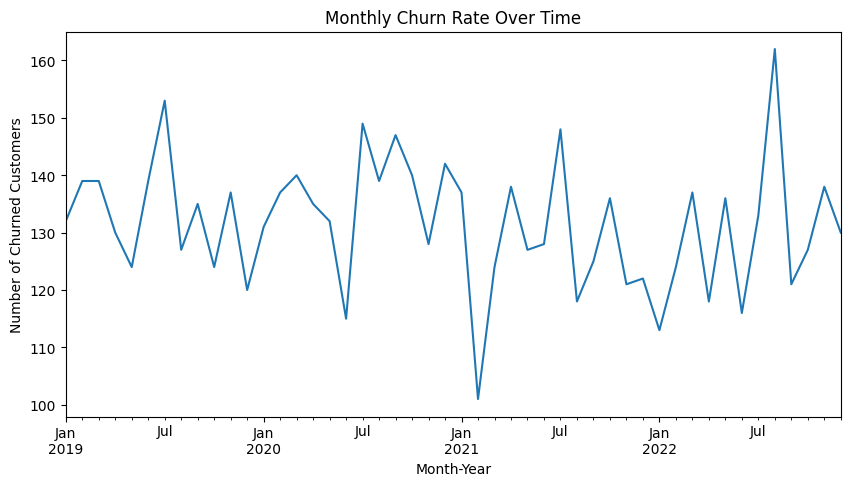

In [21]:
# plot the churn rate over time

plt.figure(figsize=(10, 5))
monthly_churn_rate.plot()
plt.title('Monthly Churn Rate Over Time')
plt.ylabel('Number of Churned Customers')
plt.xlabel('Month-Year')
plt.show()

#### Checking if there are any patterns between customer feedback `Rating` and the `ChurnLabel`

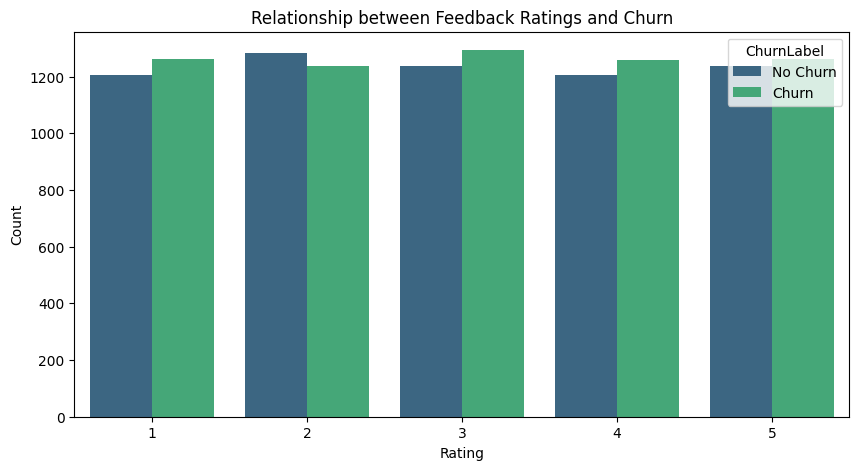

In [22]:
# Extracting rating from Feedback column and creating a new column for it

df['FeedbackRating'] = df['Feedback'].apply(lambda x: eval(x)['Rating'])

# plotting the relationship between feedback rating and churn
plt.figure(figsize=(10, 5))
sns.countplot(x='FeedbackRating', data=df, hue='ChurnLabel', palette='viridis')
plt.title('Relationship between Feedback Ratings and Churn')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='ChurnLabel', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

From the chart, there doen't seem to be any indication that the `FeedbackRating` affects the `ChurnLabel`

#### DATA PREPROCESSING AND FEATURE ENGINEERING

- creation of new features that may have predictive power
- conversion of categorical variables to numeric variables, using encoding techniques
- scaling or normalisation of numeric variablles if necessary
- splitting the data into training and test subsets
- removal of irrelevant features from the dataset

The nested values will be converted from string format to list/dictionaries using literal_eval function.

In [23]:
# Apply the literal_eval function. This will look at each value on each column of the the nested columns and convert the strings to python list and dictionaries

for feature in nested_columns:
    df[feature] = df[feature].apply(literal_eval)

In [24]:
df[feature]

0        [{'Email_Sent': '2019-10-17', 'Email_Opened': ...
1        [{'Email_Sent': '2021-08-02', 'Email_Opened': ...
2        [{'Email_Sent': '2021-08-29', 'Email_Opened': ...
3        [{'Email_Sent': '2021-02-03', 'Email_Opened': ...
4        [{'Email_Sent': '2022-03-11', 'Email_Opened': ...
                               ...                        
12478    [{'Email_Sent': '2020-11-29', 'Email_Opened': ...
12479    [{'Email_Sent': '2022-05-29', 'Email_Opened': ...
12480    [{'Email_Sent': '2020-05-18', 'Email_Opened': ...
12481    [{'Email_Sent': '2021-09-05', 'Email_Opened': ...
12482    [{'Email_Sent': '2021-02-08', 'Email_Opened': ...
Name: MarketingCommunication, Length: 12483, dtype: object

#### More features will be extracted from the dataset

In [25]:
# PurchaseHistrory(note that this is a list that contain multiple dictionaries)

df['PurchasedProducts'] = df['PurchaseHistory'].apply(lambda x: '|'.join([i['Product'] for i in x]))
#(the entire list is 'x', while 'i' is each dictionary within the list. So we pick the product from each dictionary i['Product'].

df['PurchaseFrequency'] = df['PurchaseHistory'].apply(lambda x: sum([i['Frequency'] for i in x]))  # summimg up the frquency
df['PurchaseValue'] = df['PurchaseHistory'].apply(lambda x: sum([i['Value'] for i in x]))  # total sum of customer's purchase

In [26]:
# SubscriptionDetails

df['SubscriptionPlan'] = df['SubscriptionDetails'].apply(lambda x: x['Plan'])  # this is nnot a list, only a dictionary
df['SubscriptionStartDate'] = df['SubscriptionDetails'].apply(lambda x: x['Start_Date'])
df['SubscriptionEndDate'] = df['SubscriptionDetails'].apply(lambda x: x['End_Date'])

# SubscriptionDuration - Convert the start date and end date to datetime format so as to be able to talke the difference between the days
df['SubscriptionDuration'] = (pd.to_datetime(df['SubscriptionEndDate']) - pd.to_datetime(df['SubscriptionStartDate'])).dt.days

In [27]:
# WebsiteUsage

df['WebsitePageViews'] = df['WebsiteUsage'].apply(lambda x: x['PageViews'])
df['WebsiteTimeSpent'] = df['WebsiteUsage'].apply(lambda x: x['TimeSpent(minutes)'])

In [28]:
# EngagementMetrics

df['EngagementMetricsLogins'] = df['EngagementMetrics'].apply(lambda x: x['Logins'])
df['EngagementMetricsFrequency'] = df['EngagementMetrics'].apply(lambda x: x['Frequency'])

In [29]:
# Feedback
df['FeedbackRating'] = df['Feedback'].apply(lambda x: x['Rating'])
df['FeedbackComment'] = df['Feedback'].apply(lambda x: x['Comment'])

In [30]:
# MarketingCommunication
df['MarketingCommunicationNoOfEmails'] = df['MarketingCommunication'].apply(lambda x: len(x))

# time difference between when the email was opened and when something was clicked in the email. Here we take the mean time
df['MarketingCommunicationOpenClickDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Clicked']) - pd.to_datetime(i['Email_Opened'])).days for i in x
    ])
)

# time difference between when the email was sent and when the email was opened.
df['MarketingCommunicationSentOpenDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Opened']) - pd.to_datetime(i['Email_Sent'])).days for i in x
    ])
)


#### Special extractions from three columns
- `ServiceInteractions`
- `PaymentHistory`
- `ClickstreamData`

Check for unique parameters/values in these columns

In [31]:
# Get all unique ServiceInteraction 'Types' (We are only concerned with the 'Type' here, not 'Date')
service_interaction_types = df['ServiceInteractions'].apply(lambda x: list(set([i['Type'] for i in x])))

service_interaction_types = service_interaction_types.to_list()  # conversion to list

unique_service_interaction_type = []
for i in service_interaction_types:
    unique_service_interaction_type.extend(i)
unique_service_interaction_type = list(set(unique_service_interaction_type))
print('All unique Service Interaction Types:', unique_service_interaction_type)

All unique Service Interaction Types: ['Call', 'Email', 'Chat']


In [32]:
# Get all unique PaymentHistory 'Method'
payment_history_methods = df['PaymentHistory'].apply(lambda x: list(set([i['Method'] for i in x])))
payment_history_methods = payment_history_methods.to_list()

unique_payment_history_methods = []
for i in payment_history_methods:
    unique_payment_history_methods.extend(i)
unique_payment_history_methods = list(set(unique_payment_history_methods))
print('All unique Payment History Methods:', unique_payment_history_methods)

All unique Payment History Methods: ['Credit Card', 'Bank Transfer', 'PayPal']


In [33]:
# Get all unique ClickstreamData 'Action'
clickstream_data_actions = df['ClickstreamData'].apply(lambda x: list(set([i['Action'] for i in x])))
clickstream_data_actions = clickstream_data_actions.to_list()

unique_clickstream_data_actions = []
for i in clickstream_data_actions:
    unique_clickstream_data_actions.extend(i)
unique_clickstream_data_actions = list(set(unique_clickstream_data_actions))
print('All unique Clickstream Data Actions:', unique_clickstream_data_actions)

All unique Clickstream Data Actions: ['Click', 'Add to Cart', 'Search']


In [34]:
print('All unique Service Interaction Types:', unique_service_interaction_type)
print('All unique Payment History Methods:', unique_payment_history_methods)
print('All unique Clickstream Data Actions:', unique_clickstream_data_actions)

All unique Service Interaction Types: ['Call', 'Email', 'Chat']
All unique Payment History Methods: ['Credit Card', 'Bank Transfer', 'PayPal']
All unique Clickstream Data Actions: ['Click', 'Add to Cart', 'Search']


In [35]:
# Next: the unique columns will be used to create new columns

# ServiceInteractions
for usit in unique_service_interaction_type:  # usit for user interaction type
    df[f'ServiceInteractions_{usit}'] = df['ServiceInteractions'].apply(lambda x: len([i for i in x if i['Type'] == usit]))
    # the above line of code usin f-string will extract info for email, call and chat


# PaymentHistory
df['PaymentHistoryNoOfLatePayments'] = df['PaymentHistory'].apply(lambda x: sum(i['Late_Payments'] for i in x)) # total number of late payment
df['PaymentHistoryAvgNoOfLatePayments'] = df['PaymentHistory'].apply(lambda x: np.mean([i['Late_Payments'] for i in x])) #average number


# ClickstreamData
for ucda in unique_clickstream_data_actions:
    df[f'ClickStreamData_{ucda}'] = df['ClickstreamData'].apply(lambda x: len([i for i in x if i['Action'] == ucda]))

In [36]:
# check to see a subset of the data

df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpenDiff,ServiceInteractions_Call,ServiceInteractions_Email,ServiceInteractions_Chat,PaymentHistoryNoOfLatePayments,PaymentHistoryAvgNoOfLatePayments,ClickStreamData_Click,ClickStreamData_Add to Cart,ClickStreamData_Search
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,319.0,818.0,1,1,2,40,13.333333,4,8,12
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,88.0,110.0,5,10,4,10,3.333333,9,8,7
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,117.0,333.0,1,1,1,8,2.666667,3,2,7
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,423.0,159.0,17,18,24,79,26.333333,16,15,16
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,96.0,193.0,4,5,1,2,0.666667,9,17,4


In [37]:
# check all the columns

df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp', 'MonthYear',
       'FeedbackRating', 'PurchasedProducts', 'PurchaseFrequency',
       'PurchaseValue', 'SubscriptionPlan', 'SubscriptionStartDate',
       'SubscriptionEndDate', 'SubscriptionDuration', 'WebsitePageViews',
       'WebsiteTimeSpent', 'EngagementMetricsLogins',
       'EngagementMetricsFrequency', 'FeedbackComment',
       'MarketingCommunicationNoOfEmails',
       'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentOpenDiff', 'ServiceInteractions_Call',
       'ServiceInteractions_Email', 'ServiceInteractions_Chat',
       'PaymentHistoryNoOfLatePayments', 'PaymentHistoryAvgNoOfLatePayments',
       'ClickStreamData_Cl

In [38]:
# pick out the needed columns

df_ = df[[
    'Age',
    'Gender',
    'Segment',
    'NPS',
    'ChurnLabel',
    'PurchaseFrequency',
    'PurchaseValue',
    'SubscriptionPlan',
    'WebsitePageViews',
    'WebsiteTimeSpent',
    'EngagementMetricsLogins',
    'EngagementMetricsFrequency',
    'FeedbackRating',
    'MarketingCommunicationNoOfEmails',
    'MarketingCommunicationOpenClickDiff',
    'MarketingCommunicationSentOpenDiff',
    'ServiceInteractions_Call',
    'ServiceInteractions_Email',
    'ServiceInteractions_Chat',
    'PaymentHistoryNoOfLatePayments',
    'ClickStreamData_Click',
    'ClickStreamData_Add to Cart',
    'ClickStreamData_Search',
    'SubscriptionDuration'
    
]]


df_.head()

,Age,Gender,Segment,NPS,ChurnLabel,PurchaseFrequency,PurchaseValue,SubscriptionPlan,WebsitePageViews,WebsiteTimeSpent,...,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpenDiff,ServiceInteractions_Call,ServiceInteractions_Email,ServiceInteractions_Chat,PaymentHistoryNoOfLatePayments,ClickStreamData_Click,ClickStreamData_Add to Cart,ClickStreamData_Search,SubscriptionDuration
0,31,Male,Segment B,3,1,38,3994.72,Express,49,15,...,319.0,818.0,1,1,2,40,4,8,12,871
1,66,Female,Segment C,6,0,4,2844.35,Pro,100,9,...,88.0,110.0,5,10,4,10,9,8,7,290
2,36,Female,Segment B,3,0,14,1866.52,Essential,1,97,...,117.0,333.0,1,1,1,8,3,2,7,319
3,62,Female,Segment C,1,1,28,1378.64,Smart,25,31,...,423.0,159.0,17,18,24,79,16,15,16,803
4,68,Female,Segment C,3,0,39,2425.05,Basic,77,51,...,96.0,193.0,4,5,1,2,9,17,4,580


In [39]:
# display the new columns

df_.columns

Index(['Age', 'Gender', 'Segment', 'NPS', 'ChurnLabel', 'PurchaseFrequency',
       'PurchaseValue', 'SubscriptionPlan', 'WebsitePageViews',
       'WebsiteTimeSpent', 'EngagementMetricsLogins',
       'EngagementMetricsFrequency', 'FeedbackRating',
       'MarketingCommunicationNoOfEmails',
       'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentOpenDiff', 'ServiceInteractions_Call',
       'ServiceInteractions_Email', 'ServiceInteractions_Chat',
       'PaymentHistoryNoOfLatePayments', 'ClickStreamData_Click',
       'ClickStreamData_Add to Cart', 'ClickStreamData_Search',
       'SubscriptionDuration'],
      dtype='object')

In [40]:
# check the first values of each column

df_.loc[0]

Age                                           31
Gender                                      Male
Segment                                Segment B
NPS                                            3
ChurnLabel                                     1
PurchaseFrequency                             38
PurchaseValue                            3994.72
SubscriptionPlan                         Express
WebsitePageViews                              49
WebsiteTimeSpent                              15
EngagementMetricsLogins                       19
EngagementMetricsFrequency                Weekly
FeedbackRating                                 1
MarketingCommunicationNoOfEmails               8
MarketingCommunicationOpenClickDiff        319.0
MarketingCommunicationSentOpenDiff         818.0
ServiceInteractions_Call                       1
ServiceInteractions_Email                      1
ServiceInteractions_Chat                       2
PaymentHistoryNoOfLatePayments                40
ClickStreamData_Clic

#### Encoding string data

Before encoding, check if there are too many unique values in comparison with the whole dataset, because if there are, it's best to drop them.

In [41]:
# checking the number of unique values
print('Total dataset length:', len(df_))

df_[['Gender', 'Segment', 'SubscriptionPlan', 'EngagementMetricsFrequency']].nunique()

Total dataset length: 12483


Gender                         2
Segment                        3
SubscriptionPlan              20
EngagementMetricsFrequency     3
dtype: int64

Not too much to encode, owing to its size in comparison to the total dataset

In [42]:
# Encoding Gender
gender_map = {'Male': 0, 'Female': 1}

# Encoding Segment
unique_segment = df_['Segment'].unique()
segment_map = {unique_segment[i]: i for i in range(len(unique_segment))}

# Encoding SubscriptionPlan
unique_subscription_plans = df_['SubscriptionPlan'].unique()
subscription_plan_map = {unique_subscription_plans[i]: i for i in range(len(unique_subscription_plans))}

# Encoding EngagementMetricsFrequency
unique_engagement_frequency = df_['EngagementMetricsFrequency'].unique()
engagement_frequency_map = {unique_engagement_frequency[i]: i for i in range(len(unique_engagement_frequency))}


In [43]:
# encoding proper

df_.loc[:, 'Gender'] = df_.loc[:, 'Gender'].map(gender_map)

df_.loc[:, 'Segment'] = df_.loc[:, 'Segment'].map(segment_map)

df_.loc[:, 'SubscriptionPlan'] = df_.loc[:, 'SubscriptionPlan'].map(subscription_plan_map)

df_.loc[:, 'EngagementMetricsFrequency'] = df_.loc[:, 'EngagementMetricsFrequency'].map(engagement_frequency_map)

In [44]:
# check the first values of each column again
df_.loc[0]

Age                                         31
Gender                                       0
Segment                                      0
NPS                                          3
ChurnLabel                                   1
PurchaseFrequency                           38
PurchaseValue                          3994.72
SubscriptionPlan                             0
WebsitePageViews                            49
WebsiteTimeSpent                            15
EngagementMetricsLogins                     19
EngagementMetricsFrequency                   0
FeedbackRating                               1
MarketingCommunicationNoOfEmails             8
MarketingCommunicationOpenClickDiff      319.0
MarketingCommunicationSentOpenDiff       818.0
ServiceInteractions_Call                     1
ServiceInteractions_Email                    1
ServiceInteractions_Chat                     2
PaymentHistoryNoOfLatePayments              40
ClickStreamData_Click                        4
ClickStreamDa

In [45]:
df_['Gender'].unique()

array([0, 1], dtype=object)

In [46]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

#### Correlation Matrix: This gives better insight on which values correlate with the ChurnLabel to know those that affct churn the most

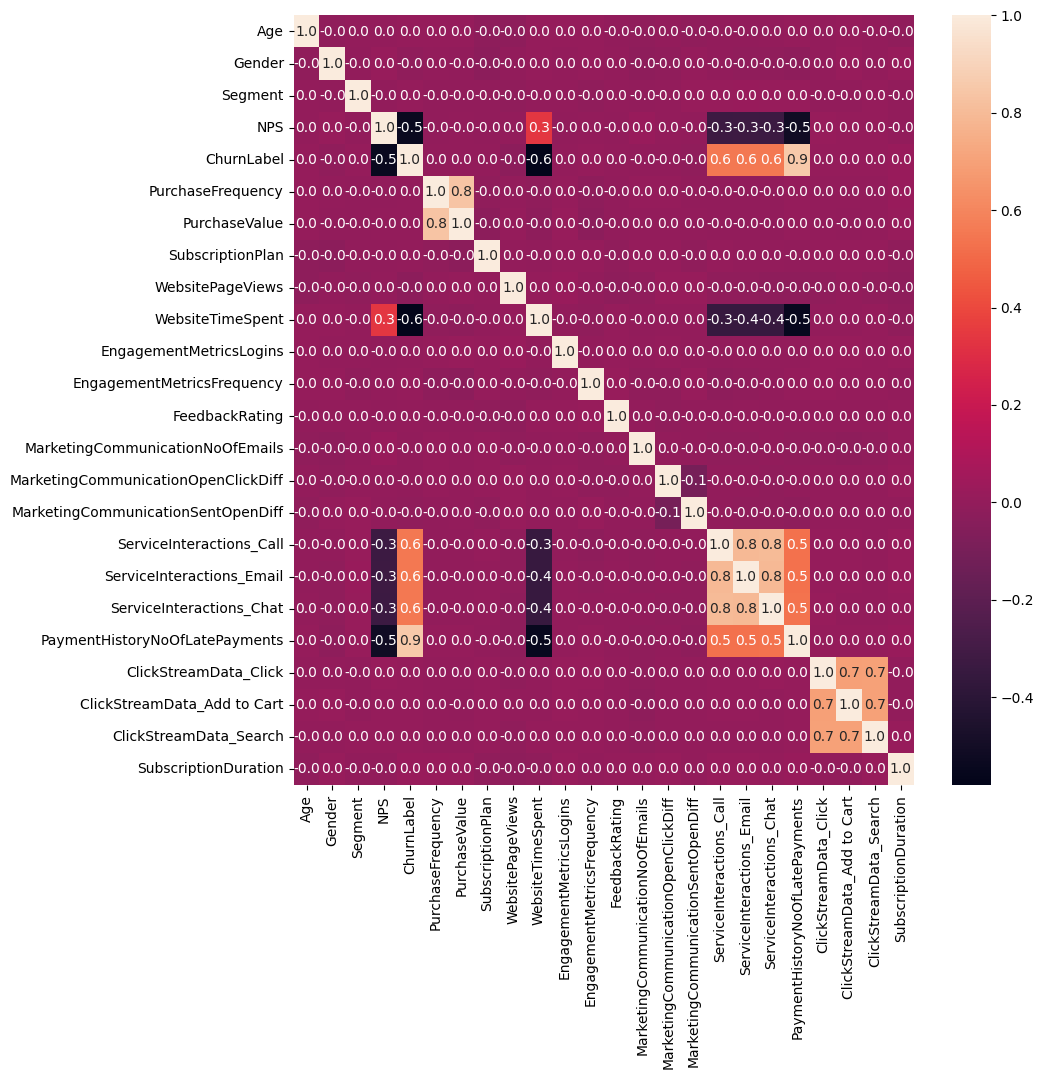

In [48]:
# Plot correlation matrix

df_corr = df_.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_corr, annot=True, fmt='.1f', ax=ax)
plt.show()

#### Split data into train, test and validation sets

In [49]:
X = df_.drop(columns=['ChurnLabel'])
y = df_['ChurnLabel']

In [50]:
X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.8, random_state=RSEED)
X_test, X_val, y_test, y_val = train_test_split(X_other, y_other, test_size=0.3, random_state=RSEED)

In [51]:
#scaling: the range of the parameters is high, hence, scaling

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

### Modelling
Two different models would be used:
- LogisticRegression
- DecisionTreeClassifier

Evaluation Metrics:
- Accuracy score
- Precision score
- Recall score
- F1 score

In [52]:
# define an evaluation function

def evaluate(X, y, model, subset=''):       # X=feature, Y=actual label
    y_pred = model.predict(X)

    print(f'{subset} Accuracy Score: {accuracy_score(y_pred, y)}')
    print(f'{subset} Precision Score: {precision_score(y_pred, y)}')
    print(f'{subset} Recall Score: {recall_score(y_pred, y)}')
    print(f'{subset} F1 Score: {f1_score(y_pred, y)}')

#### Modelling with Logistic Regression

In [53]:
# Model building
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Model evaluation
evaluate(X_train, y_train, lr, 'LogisticRegression Train')
evaluate(X_val, y_val, lr, 'Logisticregression Validation')

LogisticRegression Train Accuracy Score: 0.9710594832765872
LogisticRegression Train Precision Score: 0.9661350659578657
LogisticRegression Train Recall Score: 0.9767117834394905
LogisticRegression Train F1 Score: 0.9713946352568543
Logisticregression Validation Accuracy Score: 0.968
Logisticregression Validation Precision Score: 0.9696969696969697
Logisticregression Validation Recall Score: 0.9643835616438357
Logisticregression Validation F1 Score: 0.967032967032967


#### Modelling with Decision Trees

In [54]:
# Model building
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Model evaluation
evaluate(X_train, y_train, dt, subset='DecisionTreeClassifier Train')

evaluate(X_val, y_val, dt, subset='DecisionTreeClassifier Validation')


DecisionTreeClassifier Train Accuracy Score: 1.0
DecisionTreeClassifier Train Precision Score: 1.0
DecisionTreeClassifier Train Recall Score: 1.0
DecisionTreeClassifier Train F1 Score: 1.0
DecisionTreeClassifier Validation Accuracy Score: 0.94
DecisionTreeClassifier Validation Precision Score: 0.9476584022038568
DecisionTreeClassifier Validation Recall Score: 0.9297297297297298
DecisionTreeClassifier Validation F1 Score: 0.9386084583901774


This is a case of overfitting

In [55]:
# adding maximum depth to the decision tree
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

# Model evaluation
evaluate(X_train, y_train, dt, subset='DecisionTreeClassifier Train')

evaluate(X_val, y_val, dt, subset='DecisionTreeClassifier Validation')


DecisionTreeClassifier Train Accuracy Score: 0.9768676146605247
DecisionTreeClassifier Train Precision Score: 0.9769639692852924
DecisionTreeClassifier Train Recall Score: 0.9775413711583925
DecisionTreeClassifier Train F1 Score: 0.9772525849335302
DecisionTreeClassifier Validation Accuracy Score: 0.9693333333333334
DecisionTreeClassifier Validation Precision Score: 0.9724517906336089
DecisionTreeClassifier Validation Recall Score: 0.9644808743169399
DecisionTreeClassifier Validation F1 Score: 0.9684499314128944


The validation scores are now better in comparison with the previous

### Model evaluation on the Test Set 
This helps to stimulate the production environment when the model will encounter unseen data

In [56]:
evaluate(X_test, y_test, lr, 'LogisticRegression Test') 

evaluate(X_test, y_test, dt, 'DecisionTreeClassifier Test')

LogisticRegression Test Accuracy Score: 0.9690898683457355
LogisticRegression Test Precision Score: 0.9644495412844036
LogisticRegression Test Recall Score: 0.9733796296296297
LogisticRegression Test F1 Score: 0.9688940092165897
DecisionTreeClassifier Test Accuracy Score: 0.9730967372638809
DecisionTreeClassifier Test Precision Score: 0.9724770642201835
DecisionTreeClassifier Test Recall Score: 0.9735935706084959
DecisionTreeClassifier Test F1 Score: 0.9730349971313826


#### Confusion Matrix: For the Test Set

This will show how many were correctly classified and how many were wrongly classified

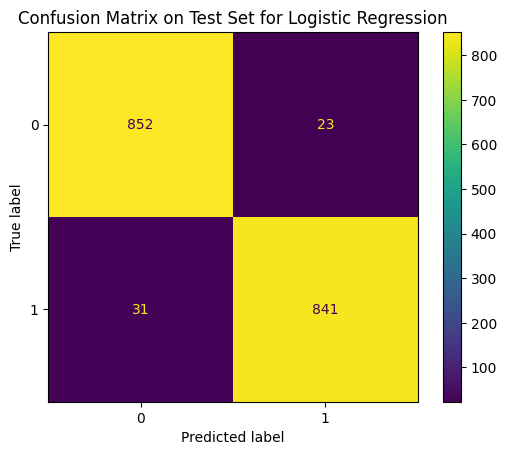

In [57]:
# LogosticsRegression

lr_y_pred = lr.predict(X_test)
logreg_confusion_matrix = confusion_matrix(y_test, lr_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=logreg_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on Test Set for Logistic Regression')
plt.show()

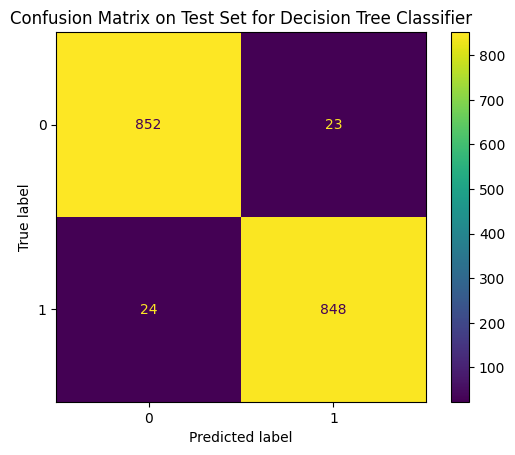

In [58]:
# DecisionTreeClassifier

dt_y_pred = dt.predict(X_test)
dectree_confusion_matrix = confusion_matrix(y_test, dt_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=dectree_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on Test Set for Decision Tree Classifier')
plt.show()


### Conclusion

The most important features:
- the number of Service Interactions the customer has had through call, Email and chat
- the number of times a customer has made late payments
- the time spent on the company's website
- the Net Promoter's Score (NPS) 